In [1]:
# Modules to Import

import pandas as pd
from EvaluateChatBot import EvalChatBot
from ChatBot import ChatBot
import matplotlib.pyplot as plt
from datasets import Dataset, Features, Sequence, Value
from ragas import evaluate
import ast

NUMBER_OF_QUESTION = 50
# import time
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision
)


In [2]:
# test_set_df
uploaded_file = "../../pdfData/Cells and Chemistry of Life.pdf"

In [3]:
#! NOTE: ONLY USE WHEN YOU WANT TO GENERATE NEW QUESTION AND ANSWER!
#list_of_eval_question_answer = EvalChatBot(uploaded_file,NUMBER_OF_QUESTION)
# questionList = []
# answerList = []
# contextList = []

# for question_answer in list_of_eval_question_answer:
#     questionList.append(question_answer['question'])
#     answerList.append(question_answer['answer'])
#     contextList.append(question_answer['contexts'])
#list_of_eval_question_answer[4]['contexts'] #! look at each question and search google for ground_truth answer!
#! ONLY RUN WHEN YOU WANT TO GENERATE TESTSET!
# df = pd.DataFrame({'question': questionList, 'answer': answerList, 'contexts': contextList})
# df.to_csv("./testSet.csv", index=False) 

In [4]:
df = pd.read_csv("./testSet.csv")
#df['ground_truth'] = ground_truthList
questionList = df['question']
answerList = df['answer']
contextList = df['contexts']

# print(questionList[99])

In [5]:
#! ONLY RUN THIS CELL WHEN YOU WANT TO GENERATE TESTSET
# i = 49
# with open("./doingTestSet.txt", 'w', encoding='utf8') as file:
#     file.writelines("Answer this question based on this context only. I want to turn your answer become my ground_truth so I can achive above 90 percents ragas score. Answer in 40 words only" + "\n")
#     file.writelines("question: " + str(questionList[i]) + "\n")
#     file.writelines("answer : " + str(answerList[i]) + "\n")
#     file.writelines("context: " + str(contextList[i]))
# print("question: " + str(questionList[4]))
# print("context: " + str(contextList[4]))

In [6]:
#! after a while i self build my own testset
ground_truthList = []
with open('./ground_truth.txt', 'r') as file:
    a = file.readlines()
for groundTruth in a:
    ground_truthList.append(groundTruth)
ground_truthList[4]


'Two key differences visible under a light microscope are: (a) plant cells have a cell wall and chloroplasts, whereas animal cells do not. (b) Plant cells possess a large central vacuole, unlike animal cells, which have smaller vacuoles.\n'

In [7]:
df = pd.read_csv("./testSet.csv")
#df['ground_truth'] = ground_truthList
questionList = df['question']
answerList = df['answer']
contextList = df['contexts']

In [8]:
contextListConvertedEleToList = [ast.literal_eval(context) for context in contextList]
type(contextListConvertedEleToList[0])

In [11]:
new_df = df
new_df['ground_truth'] = ground_truthList
new_df

,question,answer,contexts,ground_truth
0,What are some of the different parts of a cell...,The different parts of a cell include the cel...,['2 Chapter 1 Cells and the Chemistry of LifeC...,Cells consist of various parts: the cell wall ...
1,What are the three main parts that make up the...,There is no information provided in the given...,['4 Chapter 1 Cells and the Chemistry of LifeC...,The protoplasm of a cell is composed of the ce...
2,What are the main functions of the Golgi body ...,The main functions of the Golgi body in a cel...,['6 Chapter 1 Cells and the Chemistry of LifeC...,The Golgi body chemically modifies substances ...
3,What is the difference between a plant cell an...,The main differences between plant and animal...,['10 Chapter 1 Cells and the Chemistry of Life...,"Plant cells have a cell wall, chloroplasts for..."
4,What are two key differences between plant cel...,"(a) The cell membrane, cytoplasm, nucleus, an...",['10 Chapter 1 Cells and the Chemistry of Life...,Two key differences visible under a light micr...
5,Why do different types of cells have different...,Different types of cells have different shape...,['12 Chapter 1 Cells and the Chemistry of Life...,Different cell types have varied shapes and st...
6,How can plant tissue culture help improve the ...,I do not know.,"[""14 Chapter 1 Cells and the Chemistry of Life...",I don't know the answer.\n
7,How are red blood cells adapted to deliver oxy...,Red blood cells are adapted to deliver oxygen...,['12 Chapter 1 Cells and the Chemistry of Life...,Red blood cells deliver oxygen efficiently by ...
8,What is the role of the cell membrane in contr...,The cell membrane controls the movement of su...,['22 Chapter 2 Cells and the Chemistry of Life...,The cell membrane regulates the movement of su...
9,How does diffusion work and what factors affec...,Diffusion is the process of particles moving ...,['20 Chapter 2 Cells and the Chemistry of Life...,Diffusion is the movement of particles from hi...


In [12]:
# Ensure your contexts are lists of strings
data = {
    "question": questionList, #! replace with question list!
    "answer": answerList,  #! replace with response from chatbot
    "contexts": contextListConvertedEleToList,  
    "ground_truth": ground_truthList #! replace with response from EvaluateChatbot
}

# Define the features explicitly to ensure correct data types
features = Features({
    "question": Value("string"),
    "answer": Value("string"),
    "contexts": Sequence(Value("string")),  # Ensuring contexts is treated as a sequence of strings
    "ground_truth": Value("string")
})

# Convert the dictionary to a Dataset with the specified features
dataset = Dataset.from_dict(data, features=features)

# Perform the evaluation using the adjusted dataset
result = evaluate(
    dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall
    ],
)

print(result)


Evaluating:   0%|          | 0/200 [00:00<?, ?it/s]

{'context_precision': 0.8633, 'faithfulness': 0.7540, 'answer_relevancy': 0.8175, 'context_recall': 0.8900}


In [ ]:
#! plot result

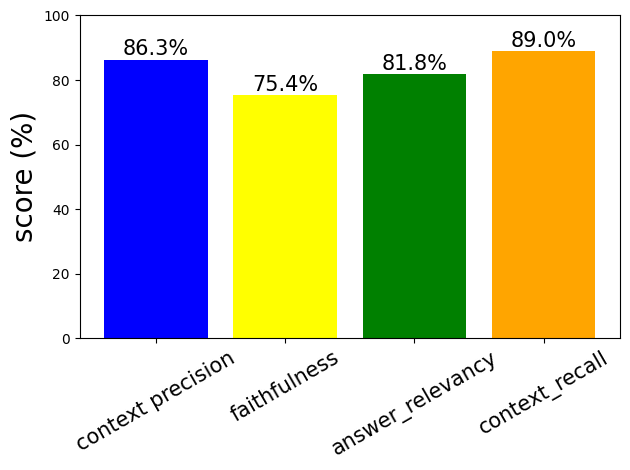

In [46]:
myCol = [result['context_precision'], result['faithfulness'], result['answer_relevancy'], result['context_recall']]
for i in range(4):
    myCol[i] = myCol[i]*100
cate = ['context precision', 'faithfulness', 'answer_relevancy', 'context_recall']
myRow = [1,2,3,4]
colors = ['blue','yellow','green','orange']
plt.bar(myRow, myCol, tick_label=cate, color=colors)
for i, value in enumerate(myCol):
    plt.text(myRow[i], value + 0.1, str(round(value, 1)) + "%", ha='center', va='bottom', size=15)
plt.ylabel("score (%)", size=20)
plt.xticks(size=15, rotation=30)
plt.ylim([0,100])
plt.tight_layout()